In [87]:
import numpy as np
import random as rd
from math import sqrt

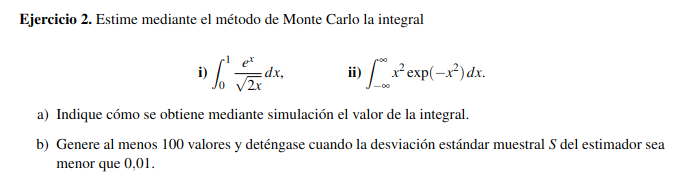

En montecarlo la estimacion de la integral es el promedio de los valores de la funcion evaluada en puntos aleatorios en el intervalo de integracion. Entonces para este caso mi "muestra aleatoria" de valores, es generar algun valor aleatorio de la funcion en el intevalo de integracion. Y de ahi calcular sucesivamente la media y la desviacion estandar.

In [4]:
def f_i(x):
    return np.exp(x) / np.sqrt(2*x)

In [12]:
def montecarlo_a_b(fun, a, b, d):
    n = 1
    mean = fun(a + (b-a)*rd.random()) * (b-a)
    Scuad = 0 # varianza

    while n <= 100 or np.sqrt(Scuad/n) >= d: # chequeo la desviaicon estandar de la media 
                                            # (varianza del estimador)
        n+=1
        x = fun(a + (b-a)*rd.random()) * (b-a)
        old_mean = mean
        mean = old_mean + (x - old_mean) / n
        Scuad = (1 - 1/(n-1)) * Scuad + n*(mean - old_mean)**2

    return n, mean, Scuad # valores genrados, media muestral, varianza muestral

In [25]:
n, mean, Scuad = montecarlo_a_b(f_i, 0, 1, 0.01)
print(f"Valores generados: {n}")
print(f"Estimacion integral (media muestral): {mean}")
print(f"Varianza muestral: {Scuad}")

Valores generados: 31504
Estimacion integral (media muestral): 2.0679525716191094
Varianza muestral: 3.1503680481949963


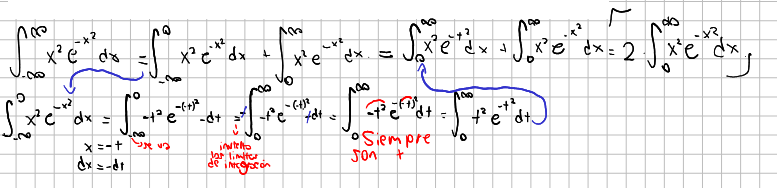

In [28]:
def f_ii(x):
    return x**2 * np.exp(-x**2)

In [88]:
def montecarlo_0_inf(fun, d):
    n = 1
    y = rd.random()
    mean = fun(1/y - 1) / (y)**2
    Scuad = 0

    while n <= 100 or sqrt(Scuad/n) >= d: # desviacion estandar de la media muestral
        n+=1
        y = rd.random()
        x = fun(1/y - 1) / (y)**2
        old_mean = mean
        mean = old_mean + (x - old_mean) / n
        Scuad = (1 - 1/(n-1)) * Scuad + n*(mean - old_mean)**2

    return n, mean, Scuad # valores genrados, media muestral, varianza muestral

In [97]:
%%time
n, mean, Scuad = montecarlo_0_inf(f_ii, 0.01)
print(f"Valores generados: {n}")
print(f"Estimacion integral (media muestral): {2*mean}")
print(f"Varianza muestral: {Scuad}")

Valores generados: 3127
Estimacion integral (media muestral): 0.8632809885218843
Varianza muestral: 0.3125602465121641
CPU times: user 16.2 ms, sys: 12 µs, total: 16.2 ms
Wall time: 15.9 ms
